# Plotting Query Results

## Setup

In [1]:
# Import Matplot lib
import matplotlib
from matplotlib import style
style.use('seaborn')
import matplotlib.pyplot as plt

In [2]:
import pandas as pd

In [3]:
# Import SQLAlchemy `automap` and other dependencies here
# YOUR CODE HERE
import sqlalchemy
from sqlalchemy.ext.automap import automap_base
from sqlalchemy.orm import Session
from sqlalchemy import create_engine
from sqlalchemy import inspect, MetaData, Table
from sqlalchemy.engine import reflection

In [4]:
# Create an engine for the `emoji.sqlite` database
engine = create_engine("sqlite:///../Resources/emoji.sqlite", echo=False)
session = Session(engine)
inspector = inspect(engine)

meta = MetaData()
user_table = Table('emoji', meta)

## Explore Database

In [5]:
# Use the Inspector to explore the database and print the table names
# YOUR CODE HERE
inspector.get_table_names()

['emoji']

In [9]:
# Use Inspector to print the column names and types
# YOUR CODE HERE

inspector.reflecttable(user_table, None)
print(user_table.columns)
inspector.get_columns("emoji")

['emoji.id', 'emoji.emoji_char', 'emoji.emoji_id', 'emoji.name', 'emoji.score']


[{'name': 'id',
  'type': INTEGER(),
  'nullable': False,
  'default': None,
  'autoincrement': 'auto',
  'primary_key': 1},
 {'name': 'emoji_char',
  'type': TEXT(),
  'nullable': True,
  'default': None,
  'autoincrement': 'auto',
  'primary_key': 0},
 {'name': 'emoji_id',
  'type': TEXT(),
  'nullable': True,
  'default': None,
  'autoincrement': 'auto',
  'primary_key': 0},
 {'name': 'name',
  'type': TEXT(),
  'nullable': True,
  'default': None,
  'autoincrement': 'auto',
  'primary_key': 0},
 {'name': 'score',
  'type': INTEGER(),
  'nullable': True,
  'default': None,
  'autoincrement': 'auto',
  'primary_key': 0}]

In [10]:
# Use `engine.execute` to select and display the first 10 rows from the emoji table
# YOUR CODE HERE

for row in session.query(user_table).limit(10):
    print(row)

(1, '😂', '1F602', 'FACE WITH TEARS OF JOY', 1814832150)
(2, '❤️', '2764', 'HEAVY BLACK HEART', 840619939)
(3, '😍', '1F60D', 'SMILING FACE WITH HEART-SHAPED EYES', 680382416)
(4, '♥️', '2665', 'BLACK HEART SUIT', 652715459)
(5, '😭', '1F62D', 'LOUDLY CRYING FACE', 515991922)
(6, '😊', '1F60A', 'SMILING FACE WITH SMILING EYES', 484540701)
(7, '♻️', '267B', 'BLACK UNIVERSAL RECYCLING SYMBOL', 452489849)
(8, '😒', '1F612', 'UNAMUSED FACE', 441690175)
(9, '💕', '1F495', 'TWO HEARTS', 381679908)
(10, '😘', '1F618', 'FACE THROWING A KISS', 377847645)


## Reflect database and Query

In [ ]:
# Reflect Database into ORM class
Base = automap_base()
Base.prepare(engine, reflect=True)
Emoji = Base.classes.emoji

In [13]:
# Start a session to query the database
session = Session(engine)
conn= engine.connect()

Use Matplotlib to create a horizontal bar chart and plot the emoji `score` in descending order. Use `emoji_char` as the y-axis labels. Plot only the top 10 emojis ranked by score

In [21]:
# Query Emojis for `emoji_char`, `emoji_id`, and `score` and save the query into results
# YOUR CODE HERE

results_df = pd.read_sql('SELECT emoji_char, emoji_id, score FROM emoji ORDER BY score DESC;', conn)

results_df.head(10)


,emoji_char,emoji_id,score
0,😂,1F602,1814832150
1,❤️,2764,840619939
2,😍,1F60D,680382416
3,♥️,2665,652715459
4,😭,1F62D,515991922
5,😊,1F60A,484540701
6,♻️,267B,452489849
7,😒,1F612,441690175
8,💕,1F495,381679908
9,😘,1F618,377847645


Unpack tuples using list comprehensions

In [24]:
# Unpack the `emoji_id` and `scores` from results and save into separate lists
# YOUR CODE HERE

emojiscore = pd.read_sql('SELECT emoji_id, score FROM emoji ORDER BY score DESC;', conn)

emojiscore.head(10)

plot_emoji= topten.set_index("emoji_id")
plot_emoji

,score
emoji_id,
1F602,1814832150
2764,840619939
1F60D,680382416
2665,652715459
1F62D,515991922
1F60A,484540701
267B,452489849
1F612,441690175
1F495,381679908


## Plot using Matplotlib

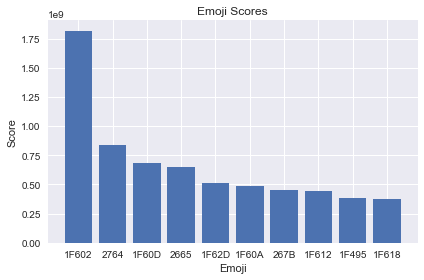

In [32]:
# Create a horizontal bar chart and plot the `emoji_id` on the y-axis and the `score` on the x-axis
# Challenge: Try to plot the scores in descending order on the graph (The largest score is at the top)
# YOUR CODE HERE


figsize=(9,3)
plt.bar(topten["emoji_id"], topten["score"])
plt.title("Emoji Scores")
plt.xlabel("Emoji")
plt.ylabel("Score")

# Save our graph and show the grap
plt.tight_layout()
#plt.savefig("../Images/emoji.png")
plt.show()

## Plot using Pandas Plotting

Load the results into a Pandas DataFrame

In [33]:
# Load the results into a pandas dataframe. Set the index to the `emoji_id`
# YOUR CODE HERE
emojiscore = pd.read_sql("SELECT score, emoji_id from emoji order by score DESC", conn)
topTen = emojiscore.head(10)
plot_emoji= topTen.set_index("emoji_id")
plot_emoji


,score
emoji_id,
1F602,1814832150
2764,840619939
1F60D,680382416
2665,652715459
1F62D,515991922
1F60A,484540701
267B,452489849
1F612,441690175
1F495,381679908


Plot using Pandas

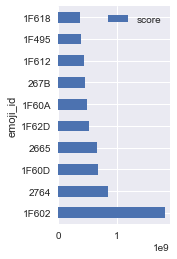

<Figure size 432x288 with 0 Axes>

In [35]:
# Plot the dataframe as a horizontal bar chart using pandas plotting
# YOUR CODE HERE

multi_plot = plot_emoji.plot(kind="barh", figsize=(2,4))

plt.show()
plt.tight_layout()

In [ ]:
# BONUS: Use Pandas `read_sql_query` to load a query statement directly into the DataFrame
# YOUR CODE HERE